# Load and Preprocess MNIST Data
Load MNIST dataset using keras.datasets, normalize pixel values, and prepare training/test splits.

In [22]:
import tensorflow as tf
from tensorflow.keras.datasets import mnist

# Load the MNIST dataset
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# Normalize pixel values to be between 0 and 1
x_train, x_test = x_train / 255.0, x_test / 255.0

# Print the shapes of the datasets
print(f"x_train shape: {x_train.shape}")
print(f"y_train shape: {y_train.shape}")
print(f"x_test shape: {x_test.shape}")
print(f"y_test shape: {y_test.shape}")

x_train shape: (60000, 28, 28)
y_train shape: (60000,)
x_test shape: (10000, 28, 28)
y_test shape: (10000,)


# Build Neural Network Model
Create a sequential model with dense layers, including input layer, hidden layers, and output layer for digit classification.

In [23]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten

# Build the neural network model
model = Sequential([
    # Flatten the input data to 1D
    Flatten(input_shape=(28, 28, 1)),
    # First hidden layer with 128 neurons and ReLU activation
    Dense(128, activation='relu'),
    # Second hidden layer with 64 neurons and ReLU activation
    Dense(64, activation='relu'),
    # Output layer with 10 neurons (one for each digit) and softmax activation
    Dense(10, activation='softmax')
])

# Print the model summary
model.summary()

/home/sam/.local/lib/python3.10/site-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten_1 (Flatten)             │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 128)            │       100,480 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 10)             │           650 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 109,386 (427.29 KB)

 Trainable params: 109,386 (427.29 KB)

 Non-trainable params: 0 (0.00 B)

# Configure Training Parameters
Set up model compilation with optimizer, loss function, and metrics for training.

In [24]:
# Configure Training Parameters
model.compile(
    optimizer='adam',  # Use Adam optimizer
    loss='sparse_categorical_crossentropy',  # Use sparse categorical crossentropy as the loss function
    metrics=['accuracy']  # Track accuracy during training
)

# Train the Model
Train the neural network on the MNIST training data with specified batch size and epochs.

In [25]:
# Train the Model
batch_size = 32  # Set the batch size
epochs = 10  # Set the number of epochs

# Train the model on the training data
history = model.fit(
    x_train, y_train,  # Training data and labels
    batch_size=batch_size,  # Batch size
    epochs=epochs,  # Number of epochs
    validation_data=(x_test, y_test)  # Validation data and labels
)

# Print the training history keys
print(history.history.keys())

Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.8734 - loss: 0.4334 - val_accuracy: 0.9591 - val_loss: 0.1310
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9661 - loss: 0.1119 - val_accuracy: 0.9680 - val_loss: 0.0989
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9769 - loss: 0.0749 - val_accuracy: 0.9738 - val_loss: 0.0871
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9830 - loss: 0.0538 - val_accuracy: 0.9726 - val_loss: 0.0882
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9867 - loss: 0.0410 - val_accuracy: 0.9723 - val_loss: 0.0904
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9907 - loss: 0.0300 - val_accuracy: 0.9782 - val_loss: 0.0707
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9916 - loss: 0.0255 - val_accuracy: 0.9760 - val_loss: 0.0819
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9937 - loss: 0.0198 - 

# Evaluate Model Performance
Test the model's performance on the test dataset and display accuracy metrics.

313/313 - 0s - 913us/step - accuracy: 0.9772 - loss: 0.0911
Test accuracy: 0.9772


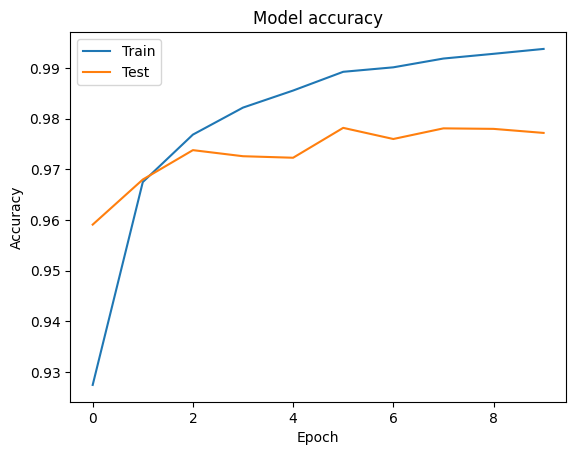

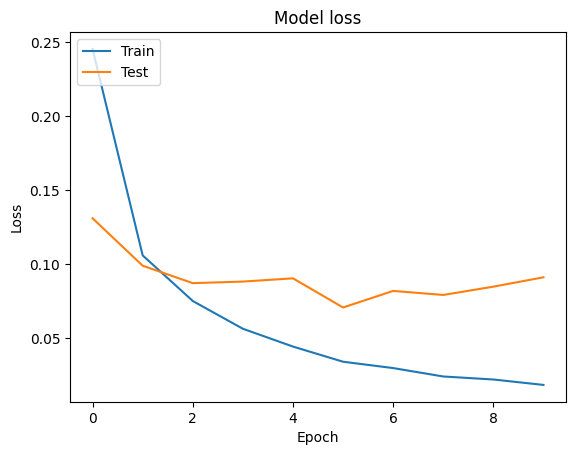

In [26]:
# Evaluate Model Performance

# Evaluate the model on the test dataset
test_loss, test_accuracy = model.evaluate(x_test, y_test, verbose=2)

# Print the test accuracy
print(f"Test accuracy: {test_accuracy:.4f}")

# Plot training & validation accuracy values
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

# Visualize Predictions
Display sample test images and their predicted digits alongside true labels.

  1/313 ━━━━━━━━━━━━━━━━━━━━ 9s 31ms/step

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 971us/step


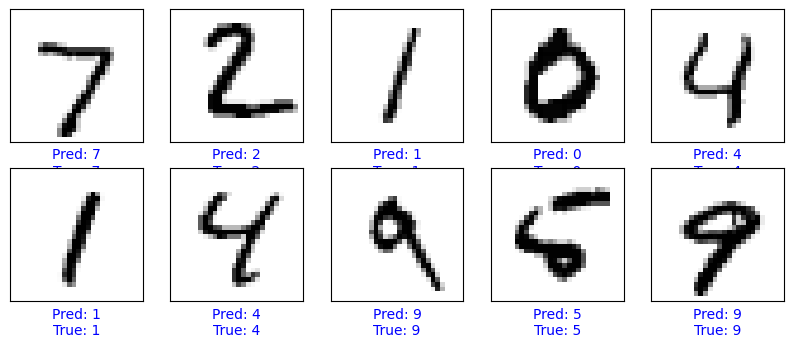

In [27]:
import numpy as np
import matplotlib.pyplot as plt

# Predict the labels for the test set
predictions = model.predict(x_test)

# Function to plot images along with their predicted and true labels
def plot_images(images, true_labels, predicted_labels, num_images=10):
    plt.figure(figsize=(10, 10))
    for i in range(num_images):
        plt.subplot(5, 5, i + 1)
        plt.xticks([])
        plt.yticks([])
        plt.grid(False)
        plt.imshow(images[i], cmap=plt.cm.binary)
        predicted_label = np.argmax(predicted_labels[i])
        true_label = true_labels[i]
        color = 'blue' if predicted_label == true_label else 'red'
        plt.xlabel(f"Pred: {predicted_label}\nTrue: {true_label}", color=color)
    plt.show()

# Plot sample test images with their predicted and true labels
plot_images(x_test, y_test, predictions)

In [28]:
import tensorflowjs as tfjs

# Print model details before export
print("Input shape:", model.input_shape)

# input_shape = (28, 28, 1)

# model.build(input_shape=(None, *input_shape))

# print("New input shape:", model.input_shape)

print("\nModel Summary:")
model.summary()

# Verify input layer configuration
input_layer = model.layers[0]
print("\nInput layer config:", input_layer.get_config())

# Export with shape verification
tfjs.converters.save_keras_model(model, "tfjs_model")

# Verify exported model.json (optional)
import json
with open('tfjs_model/model.json', 'r') as f:
    model_json = json.load(f)
    print("\nExported model input shape:", model_json)
        #   model_json['config']['layers'][0]['config']['batch_input_shape'])


Input shape: (None, 28, 28, 1)

Model Summary:


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten_1 (Flatten)             │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 128)            │       100,480 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 10)             │           650 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 328,160 (1.25 MB)

 Trainable params: 109,386 (427.29 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 218,774 (854.59 KB)


Input layer config: {'name': 'flatten_1', 'trainable': True, 'dtype': {'module': 'keras', 'class_name': 'DTypePolicy', 'config': {'name': 'float32'}, 'registered_name': None}, 'data_format': 'channels_last'}
failed to lookup keras version from the file,
    this is likely a weight only file

Exported model input shape: {'format': 'layers-model', 'generatedBy': 'keras v3.6.0', 'convertedBy': 'TensorFlow.js Converter v4.22.0', 'modelTopology': {'keras_version': '3.6.0', 'backend': 'tensorflow', 'model_config': {'class_name': 'Sequential', 'config': {'name': 'sequential_1', 'trainable': True, 'dtype': {'module': 'keras', 'class_name': 'DTypePolicy', 'config': {'name': 'float32'}, 'registered_name': None}, 'layers': [{'class_name': 'InputLayer', 'config': {'batch_shape': [None, 28, 28, 1], 'dtype': 'float32', 'sparse': False, 'name': 'input_layer_1'}}, {'class_name': 'Flatten', 'config': {'name': 'flatten_1', 'trainable': True, 'dtype': {'module': 'keras', 'class_name': 'DTypePolicy', 'co